# Data Mining
# Members: 
## 1. Apostolopoulou Alexandra (1115201700005)
## 2. Briakos Spyridon (1115201700101)
## Project 1

### Note:


There is a posibility the map doesn't appear to this file. For this reason, we saved it in a file named map.html, in which you can see it from there.

In [112]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
import folium
from itertools import cycle, islice
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
from pandas import options
import warnings
import tables

In [113]:
options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=tables.NaturalNameWarning)

"""
Read the appropriate columns from listings.csv
and and a new column for month with value
1 (for enable), NaN (for disable)
"""

path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/febrouary/listings.csv'

df1 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])

df1['month'] = 1

In [114]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/march/listings.csv'

df2 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])

df2['month'] = 1

In [115]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/april/listings.csv'

df3 = pd.read_csv(path, usecols = ['id','zipcode','transit','bedrooms','beds','review_scores_rating','number_of_reviews','neighbourhood','name','latitude','longitude','last_review','instant_bookable','host_since','host_response_rate','host_identity_verified','host_has_profile_pic','first_review','description','city','cancellation_policy','bed_type','bathrooms','accommodates','amenities','room_type','property_type','price','availability_365','minimum_nights'])
df3['month'] = 1

In [116]:
# Merge the two dataframes, using id column as key
df4 = pd.merge(df1, df2, how='outer',on = 'id')
df4.set_index('id', inplace = True)

# Write it to a new CSV file
df4.to_csv('merged.csv')

#df4

In [117]:
# Merge the two dataframes, using _ID column as key
df5 = pd.merge(df3, df4, how='outer', on = 'id')
df5.set_index('id', inplace = True)

# Write it to a new CSV file
df5.to_csv('train.csv')

In [118]:
path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/train.csv'

df = pd.read_csv(path)

"""               
Drop the columns we believe that stay immutable
in order to reduce the duplicates
"""  

df.drop(['zipcode_x','zipcode_y','transit_x','transit_y','bedrooms_x','bedrooms_y','beds_x','beds_y','neighbourhood_x','neighbourhood_y','name_x','name_y','latitude_x','latitude_y','longitude_x','longitude_y','first_review_x','first_review_y','description_x','description_y','city_x','city_y','cancellation_policy_x','cancellation_policy_y','bed_type_x','bed_type_y','bathrooms_x','bathrooms_y','room_type_x','room_type_y','availability_365_x','availability_365_y','property_type_x','property_type_y'],axis=1,inplace=True)

In [119]:
#Fill the NaN values of the DataFrame with '-' and rename some columns.

df.fillna('-',inplace=True)
df.rename(columns = {'month':'april'}, inplace = True) 
df.rename(columns = {'month_x':'febrouary'}, inplace = True) 
df.rename(columns = {'month_y':'march'}, inplace = True) 

### Note:

We decided to keep the Nan values, as they are a large part of the records in many cases.

For example, if a client wants to filter his results based on the type of the room, there are about 720 accomodations that they haven't a room type. This means that the client will lose a big percentage of potential choices and the owners will lose a big percentage of potential customers.

## Question 1.1

In [120]:
#Create a dictionary of room_type and its frequency number 
room_type_dict = {}

for i in df.index:
    temp = df['room_type'][i]
    if temp in room_type_dict:
        room_type_dict[temp] = room_type_dict[temp] + 1
    else: 
        room_type_dict[temp] = 1

room_types = []
data = []

for key in room_type_dict:
    room_types.append(key)
    data.append(room_type_dict[key])

dataf = {'Room_Type':room_types, 'Frequency':data} 
df_new = pd.DataFrame(dataf) 
display(df_new.style.hide_index())

Room_Type,Frequency
Entire home/apt,8510
Private room,1104
Shared room,47
-,724


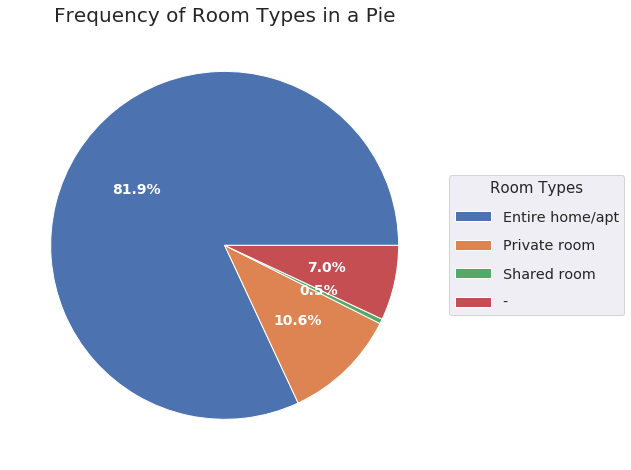

In [121]:
"""
We represent our data in a pie,
in order to clearly see the most common type
room.
"""

fig, ax = plt.subplots(figsize=(16,8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, room_types,
          title="Room Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)

plt.setp(autotexts, size=14,weight="bold")

ax.set_title("Frequency of Room Types in a Pie",size=20)

plt.show()

We can observe that the most frequent room_type for our data is "Entire home/apt".

## Question 1.2

In [122]:
""" 
We replace the NaN values and get rid of the 
character "$" from the columns of the prices,
so as we can find the average of 3 months.
""" 
df.loc[df['price'] == '-','price'] = np.nan
df.loc[df['price_x'] == '-','price_x'] = np.nan
df.loc[df['price_y'] == '-','price_y'] = np.nan
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df["price_x"] = df["price_x"].replace('[\$,]', '', regex=True).astype(float)
df["price_y"] = df["price_y"].replace('[\$,]', '', regex=True).astype(float)
mean_febrouary = df["price_x"].mean(skipna=True)
mean_march = df["price_y"].mean(skipna=True)
mean_april = df["price"].mean(skipna=True)

print(mean_febrouary)
print(mean_march)
print(mean_april)

65.49791208791208
64.89445572054268
64.36373046268503


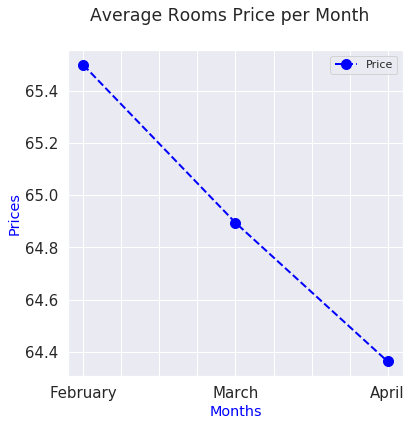

In [123]:
"""
We represent the values with the form of a diagram,
in order to show the development of prices
between the three months.
"""

data = [['February', mean_febrouary], ['March', mean_march], ['April', mean_april]] 
help_df = pd.DataFrame(data, columns = ['Month', 'Price'])

help_df.plot(x='Month',y='Price', figsize=(6,6), color='blue', marker='o', fontsize=15,linestyle='dashed',linewidth=2, markersize=10)
plt.suptitle('Average Rooms Price per Month',fontsize='x-large')
plt.ylabel('Prices',fontsize='large',color='blue')
plt.xlabel('Months',fontsize='large',color='blue')
plt.show()

We observe that in February the prices are higher on average, while in April the prices are lower on average, than the other two months.

## Question 1.3

In [124]:
"""
We make a dictionary with the reviews
per neighborhood and sort it in descending order,
in order to get the 5 neighborhoods with the most
critics.
"""
neigh_reviews_dict = {}

df.loc[df['number_of_reviews'] == '-','number_of_reviews'] = '0'

df["number_of_reviews"] = df['number_of_reviews'].astype(int)

for i in df.index:
    temp = df['neighbourhood'][i]
    if temp in neigh_reviews_dict:
        neigh_reviews_dict[temp] = neigh_reviews_dict[temp] + df['number_of_reviews'][i] 
    else: 
        neigh_reviews_dict[temp] = df['number_of_reviews'][i]
        
sorted_d = dict(sorted(neigh_reviews_dict.items(), key=operator.itemgetter(1),reverse=True))

datalist = []
for key,value in sorted_d.items():
    datalist.append([key,value])

df32 = pd.DataFrame(datalist,columns=['Neighbourhoods','Reviews'])
display(df32.style.hide_index())

Neighbourhoods,Reviews
Plaka,46637
Koukaki,30470
Neos Kosmos,27626
Psyri,17752
Metaxourgeio,15356
Pangrati,14857
Larissis,14521
Kolonaki,14512
Exarcheia,14432
Kerameikos,13640


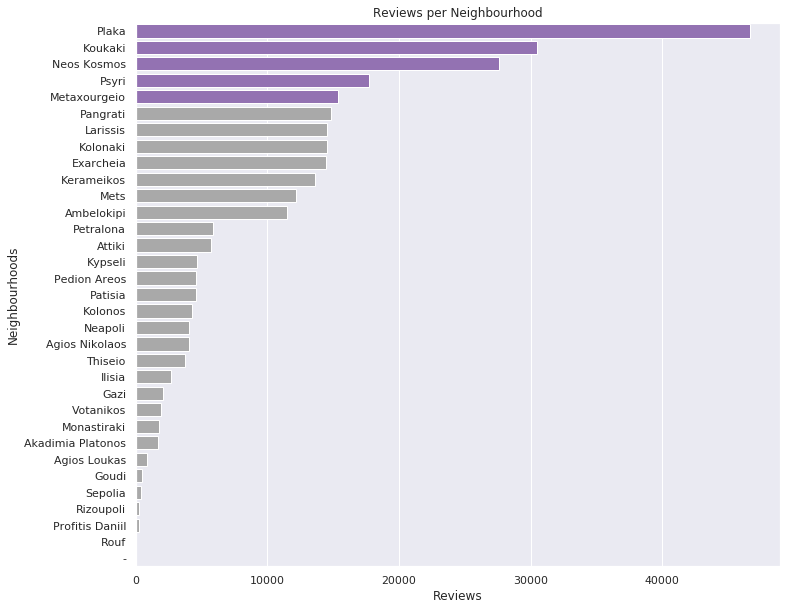

In [125]:
"""
We represent the data using bars
and we "blacken" the five neighborhoods with
the most reviews.
"""

colors = ['tab:purple' if i in datalist[:5] else 'darkgrey' for i in datalist]

sns.set(rc={'figure.figsize':(len(datalist) * 0.35, 10)})
plot1 = sns.barplot(x='Reviews', y='Neighbourhoods', data=df32, palette=colors, orient='h') \
                        .set_title('Reviews per Neighbourhood')

We notice that the neighborhoods with the most reviews are:
1. Plaka
2. Koukaki
3. Neos Kosmos
4. Psyri
5. Metaxourgeio

## Question 1.4

In [126]:
"""
We make a dictionary with the number of properties
per neighborhood and sort it in descending order,
so as to find the one with the biggest number of properties.
"""
neigh_dict = {}

for i in df.index:
    temp = df['neighbourhood'][i]
    if temp in neigh_dict:
        neigh_dict[temp] = neigh_dict[temp] + 1
    else: 
        neigh_dict[temp] = 1
        
sorted_d = dict(sorted(neigh_dict.items(), key=operator.itemgetter(1),reverse=True))

datalist = []
for key,value in sorted_d.items():
    datalist.append([key,value])

df32 = pd.DataFrame(datalist,columns=['Neighbourhoods','Number_of_Estates'])
display(df32.style.hide_index())

Neighbourhoods,Number_of_Estates
Plaka,1116
Neos Kosmos,809
Koukaki,806
-,735
Kolonaki,611
Pangrati,602
Larissis,557
Metaxourgeio,525
Ambelokipi,511
Psyri,504


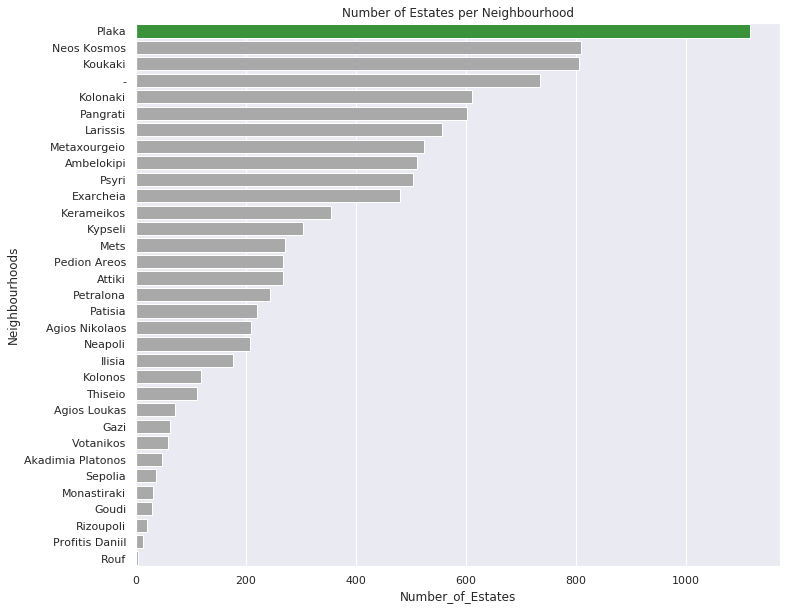

In [127]:
"""
We represent the data using bars
and we "blacken" the neighborhood with
the most reviews.
"""    
colors = ['tab:green' if i in datalist[:1] else 'darkgrey' for i in datalist]

sns.set(rc={'figure.figsize':(len(datalist) * 0.35, 10)})
plot2 = sns.barplot(x='Number_of_Estates', y='Neighbourhoods', data=df32, palette=colors, orient='h') \
                        .set_title('Number of Estates per Neighbourhood')

We observe that the neighborhood with the biggest number of properties is by far Plaka.

## Question 1.5

In [128]:
"""
Firstly, we get the appropriate columns that
we need for the question and we "group" them
per neighborhood and we count the entries that
were done in each neighborhood for each month.
"""
df_new = df[['neighbourhood','id','febrouary','march','april']].copy()

df_new.loc[df_new['march'] == '-','march'] = np.nan
df_new.loc[df_new['febrouary'] == '-','febrouary'] = np.nan
df_new.loc[df_new['april'] == '-','april'] = np.nan
df_new = df_new.groupby('neighbourhood').count().reset_index().sort_values(by=['id'])

display(df_new.style.hide_index())

neighbourhood,id,febrouary,march,april
Rouf,4,4,4,4
Profitis Daniil,13,11,12,13
Rizoupoli,21,18,18,21
Goudi,30,26,27,30
Monastiraki,31,24,26,31
Sepolia,37,27,32,37
Akadimia Platonos,47,38,44,47
Votanikos,59,51,53,59
Gazi,62,58,58,62
Agios Loukas,71,61,62,71


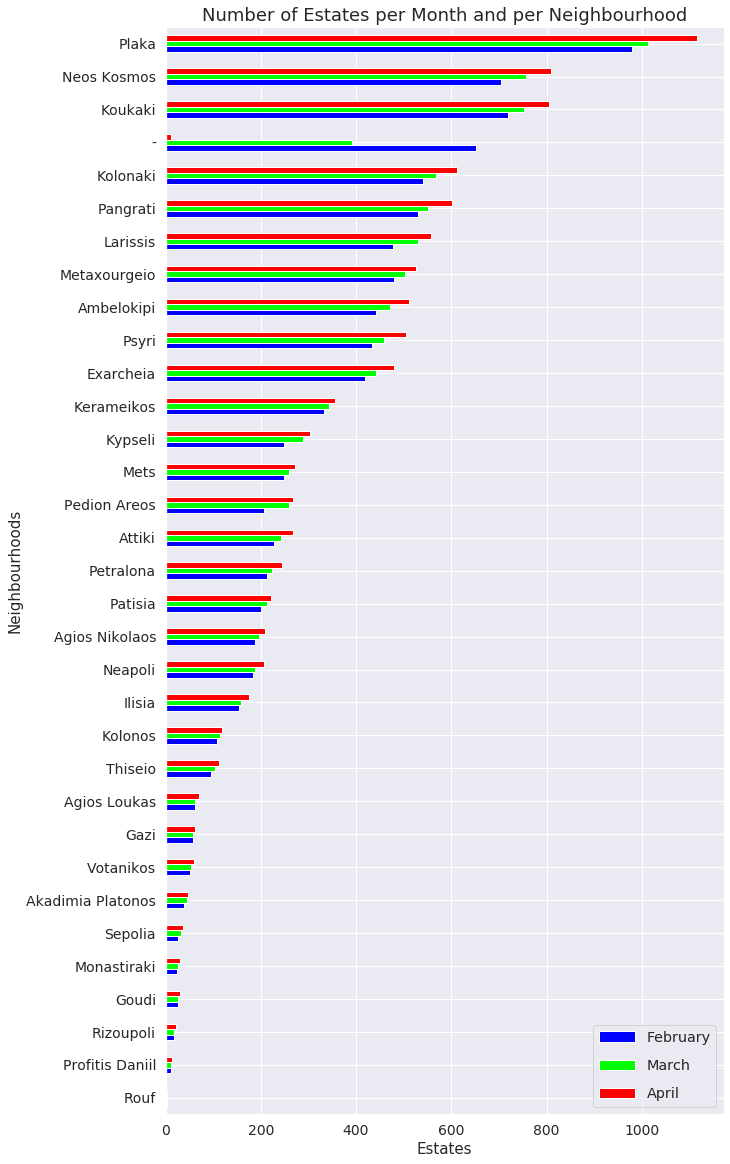

In [129]:
"""
Afterwards, we represent the above information
using bars, in which the y-axis has the
neighborhoods, the x-axis has the prices of the properties
and each neighborhood is accompanied by three bars
representing the months.
"""

sortedneighbourhoods = []
sortedneighbourhoods = df_new["neighbourhood"].to_list()

feb_estates = []
feb_estates = df_new["febrouary"].to_list()
mar_estates = []
mar_estates = df_new["march"].to_list()
apr_estates = []
apr_estates = df_new["april"].to_list()

my_colors = list(islice(cycle(['blue', 'lime', 'red']), None, len(df)))

df_res = pd.DataFrame({'February': feb_estates,'March': mar_estates, 'April': apr_estates}, index=sortedneighbourhoods)
ax = df_res.plot.barh(figsize=(10,20),fontsize=14,title='Number of Estates per Month and per Neighbourhood', color=my_colors)
ax.title.set_size(18)
ax.set_xlabel("Estates",size=15)
ax.set_ylabel("Neighbourhoods",size=15)
ax.legend(handlelength=2.5, labelspacing=1, fontsize='large')


*Here* we observe that once again Plaka comes first in number of properties for all months with a relatively large difference with the other neighborhoods.

## Question 1.6

In [130]:
"""
Here in order to make the histogram
of the neighborhood column, we collected
the entries per neighborhood.
"""

df_new = df[['neighbourhood','id'].copy()]
df_new = df_new.groupby('neighbourhood').count().reset_index()
display(df_new.style.hide_index())

neighbourhood,id
-,735
Agios Loukas,71
Agios Nikolaos,209
Akadimia Platonos,47
Ambelokipi,511
Attiki,267
Exarcheia,480
Gazi,62
Goudi,30
Ilisia,176


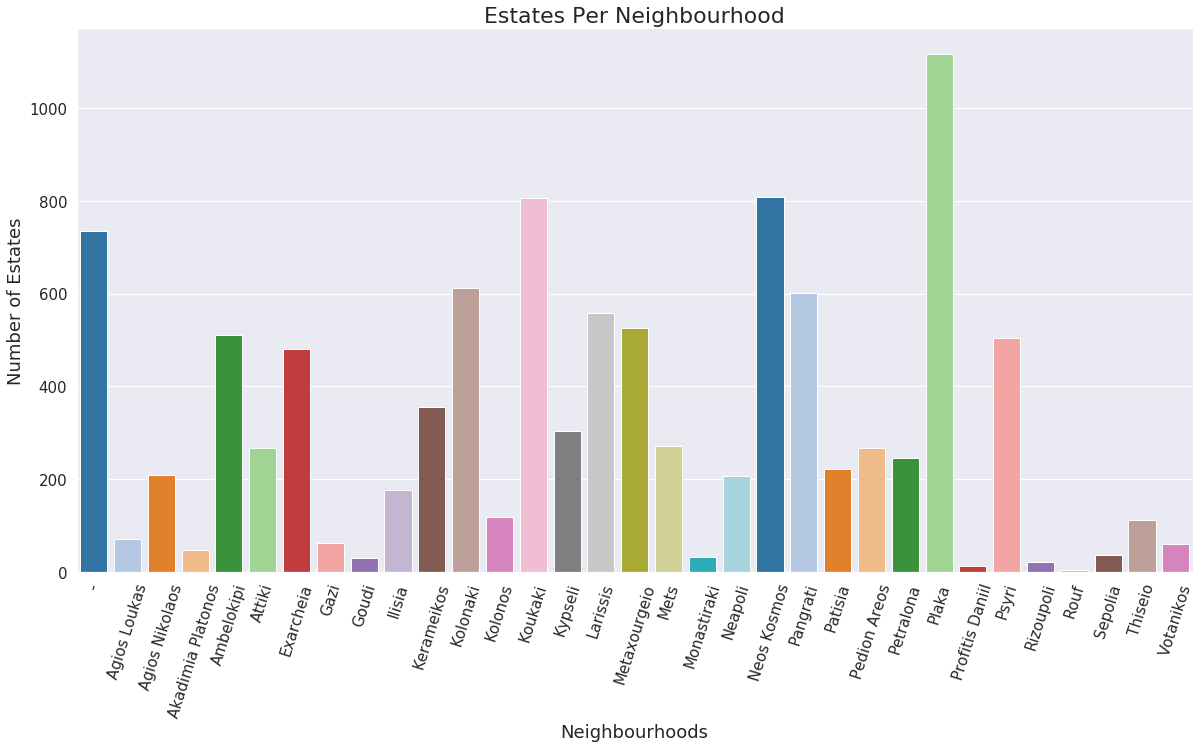

In [131]:
"""
We represent the above information using bars.
"""

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='neighbourhood', y='id', data=df_new, palette='tab20')\
                    .set_title('Estates Per Neighbourhood',fontsize=22)

plt.xticks(rotation=72.5)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Number of Estates', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

We notice that Plaka has the biggest number of accomondatons.

## Question 1.7

In [132]:
"""
Here we group our data based on the neighborhood
and room_type, we count room entries per
room_type and sort the result to find
the most common room type per neighborhood.
"""

df_new = df[['id','neighbourhood','room_type'].copy()]
df_new = df_new.groupby(['neighbourhood','room_type']).count().reset_index().sort_values(by=['id'])
pd.set_option('display.max_rows', 100)
display(df_new.style.hide_index())

neighbourhood,room_type,id
Kolonaki,Shared room,1
Kolonos,Shared room,1
-,Private room,1
Profitis Daniil,Shared room,1
Agios Loukas,Shared room,1
Koukaki,Shared room,1
Larissis,Shared room,1
Akadimia Platonos,Shared room,1
Ambelokipi,Shared room,1
Pangrati,Shared room,1


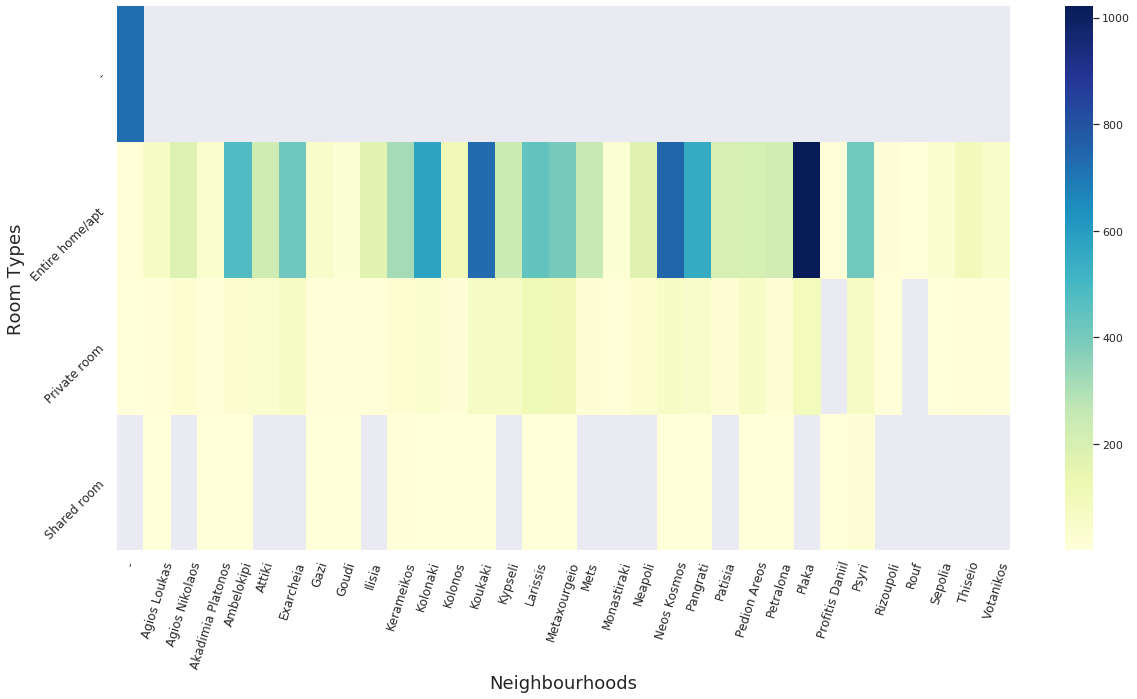

In [133]:
"""
Here we decide to represent the above data
in a heatmap, so as to see the most common
room type in every neighbourhood.
"""

heatmap = pd.pivot_table(df_new, values='id',index=['room_type'],columns='neighbourhood')

sns.heatmap(heatmap,fmt="d",cmap="YlGnBu")
plt.xticks(rotation=72.5)
plt.yticks(rotation=45)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Room Types', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

We notice that for every neighborhood, almost always the most common room type is the Apartment.

We will, however, represent the above information again, without the data that have no values, e.g the ΝΑΝ,
in order to make the result more obvious (as we are not so interested in this example to display information about neighborhoods and rooms that have not been given prices).

In [134]:
df_new = df_new[(df_new[['neighbourhood','room_type']] != '-').all(axis=1)]
display(df_new.style.hide_index())

neighbourhood,room_type,id
Kolonaki,Shared room,1
Kolonos,Shared room,1
Profitis Daniil,Shared room,1
Agios Loukas,Shared room,1
Koukaki,Shared room,1
Larissis,Shared room,1
Akadimia Platonos,Shared room,1
Ambelokipi,Shared room,1
Pangrati,Shared room,1
Goudi,Shared room,2


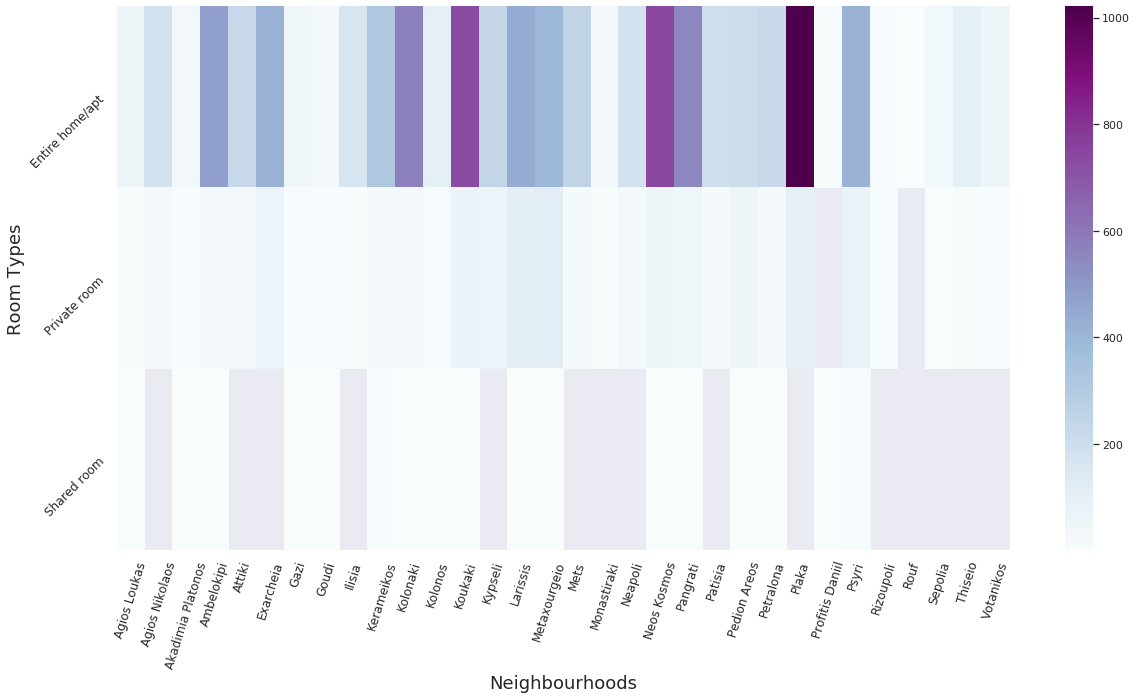

In [135]:
heatmap = pd.pivot_table(df_new, values='id',index=['room_type'],columns='neighbourhood')

sns.heatmap(heatmap, cmap="BuPu")
plt.xticks(rotation=72.5)
plt.yticks(rotation=45)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Room Types', fontsize=18)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

## Question 1.8

In [136]:
"""
Here we find the average prices
for each room from all months
and sort them in descending order.
"""
df_new = df[['id','room_type','price','price_x','price_y'].copy()]
#Create a new colunm with the average of prices of the 3 months
df_new['mean_price'] = df_new[['price','price_x','price_y']].mean(axis=1)
#Drop the columns that we don;t need anymore.
df_new.drop(['price','price_x','price_y','id'], axis=1,inplace=True)

df_new = df_new.groupby('room_type').mean().reset_index().sort_values(by=['mean_price'])

display(df_new.style.hide_index())

room_type,mean_price
Shared room,33.046099
Entire home/apt,62.840090
-,67.832873
Private room,78.672705


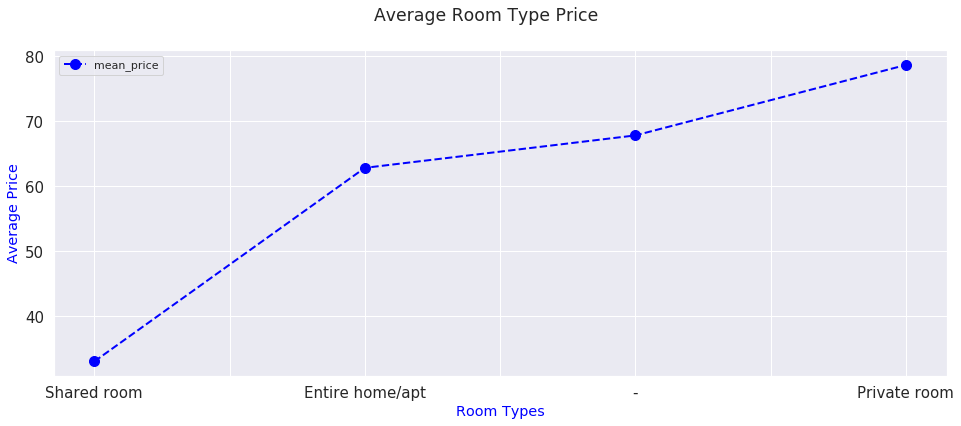

In [137]:
"""
We represent the above information
in the form of a diagram to show
the development of prices of each room type.
"""

df_new.plot(x='room_type',y='mean_price', figsize=(16,6), color='blue', marker='o', fontsize=15,linestyle='dashed',linewidth=2, markersize=10)
plt.suptitle('Average Room Type Price',fontsize='x-large')
plt.ylabel('Average Price',fontsize='large',color='blue')
plt.xlabel('Room Types',fontsize='large',color='blue')
plt.show()

We observe, therefore, that the most expensive room type is the "Private Room", while the cheapest is the "Shared room".

## Question 1.9

In [138]:
"""
Here we used the Folium Map library
to represent through the columns
latitude and longitude the map with the properties.
"""

df_new = df[['id','latitude','longitude','room_type'].copy()]
df_new.loc[df_new['latitude'] == '-','latitude'] = np.nan
df_new.loc[df_new['longitude'] == '-','longitude'] = np.nan
df_new.loc[df_new['room_type'] == '-','room_type'] = np.nan
df_new.dropna(axis=0,inplace=True)

In [139]:
"""
For the pop up on the map we chose to
shows information about the kind of the
room that it offers.
"""

locations = df_new[['latitude', 'longitude']]
locationlist = locations.values.tolist()

map = folium.Map(location=[37.98888, 23.76431], zoom_start=14)
for point in range(0, 500):
    folium.Marker(locationlist[point], popup=df_new['room_type'][point]).add_to(map)

map.save('map.html')
map

## Question 1.10

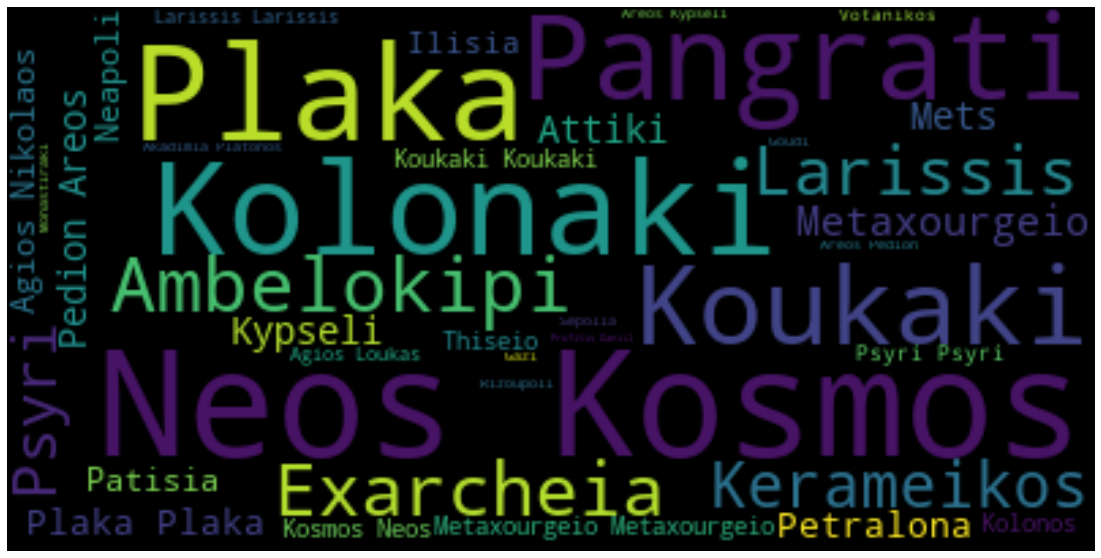

In [140]:
"""
Wordcloud for the column neighbourhood.
"""

text = " ".join(str(n) for n in df['neighbourhood'])
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

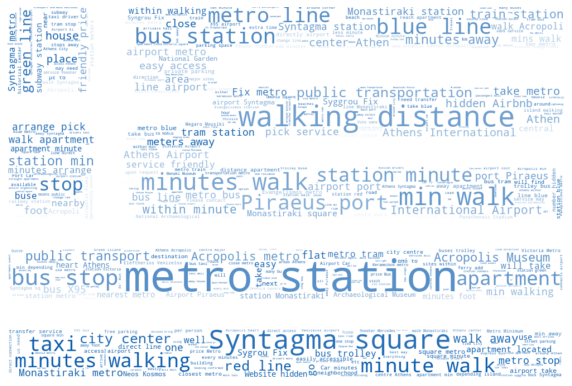

In [141]:
"""
Wordcloud for the column transit.
"""

text = " ".join(str(n) for n in df['transit'])
mask = np.array(Image.open("/home/alexa/Documents/Data_Mining/ERGASIA_1/greece.jpg"))
wordcloud_spa = WordCloud(width = 512, height = 512,stopwords=STOPWORDS,background_color="white",mode="RGB", max_words=500, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("/home/alexa/Documents/Data_Mining/ERGASIA_1/Greece.png", format="png")
plt.show()

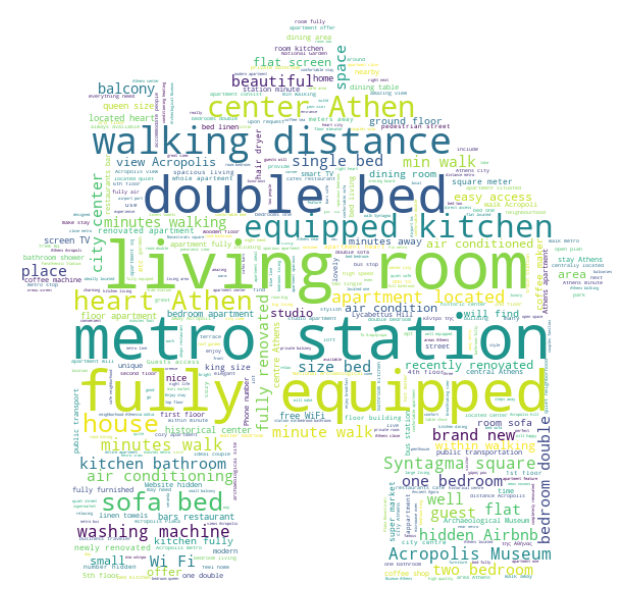

In [142]:
"""
Wordcloud for the column description.
"""

text = " ".join(str(n) for n in df['description'])
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

def generate_wordcloud(text, mask):
    word_cloud = WordCloud(width = 512, height = 512, max_words=500, stopwords=STOPWORDS, background_color='white', mask=mask).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
generate_wordcloud(text, mask)

In [143]:
"""
Wordcloud for the comments' column.
Here we merged listings.csv with
the reviews.csv by date, in order
to get the comments.
"""

path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/data/april/reviews.csv'

df1 = pd.read_csv(path, usecols = ['date','comments'])
last_review_date = df[['last_review'].copy()]

last_review_date[last_review_date.last_review != '-']
last_review_date.rename(columns = {'last_review':'date'}, inplace = True) 
df15 = pd.merge(df1, last_review_date, how='inner',on = 'date')
df15.drop_duplicates(subset='comments', keep='first',inplace = True)

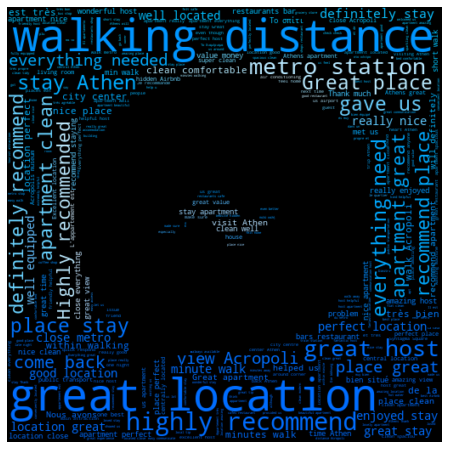

In [144]:
text = " ".join(str(n) for n in df15['comments'])
mask = np.array(Image.open("/home/alexa/Documents/Data_Mining/ERGASIA_1/mes.png"))
wordcloud_spa = WordCloud(width = 512, height = 512,background_color="black",stopwords=STOPWORDS, max_words=500, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,8])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("/home/alexa/Documents/Data_Mining/ERGASIA_1/Greece.png", format="png")
plt.show()

## Question 1.12

In [145]:
"""
In this question we found the average 
score of reviews by neighbourhood.
"""
new_df = df[['id','neighbourhood','review_scores_rating','review_scores_rating_x','review_scores_rating_y'].copy()]
new_df = new_df.replace('-', np.nan)
new_df = new_df.dropna()
new_df['mean_score'] = new_df[['review_scores_rating','review_scores_rating_x','review_scores_rating_y']].mean(axis=1)
# # df_new.loc[:,'mean_price'] = df_new.loc[:,('price','price_x','price_y')].mean(axis=1)
new_df.drop(['review_scores_rating','review_scores_rating_x','review_scores_rating_y','id'], axis=1,inplace=True)
new_df = new_df.groupby('neighbourhood').mean().reset_index().sort_values(by=['mean_score'])

display(new_df.style.hide_index())

neighbourhood,mean_score
Monastiraki,91.641026
Metaxourgeio,93.381400
Larissis,93.723887
Attiki,94.016760
Ilisia,94.069307
Agios Nikolaos,94.338346
Profitis Daniil,94.600000
Psyri,94.618313
Pedion Areos,94.918519
Neapoli,95.104308


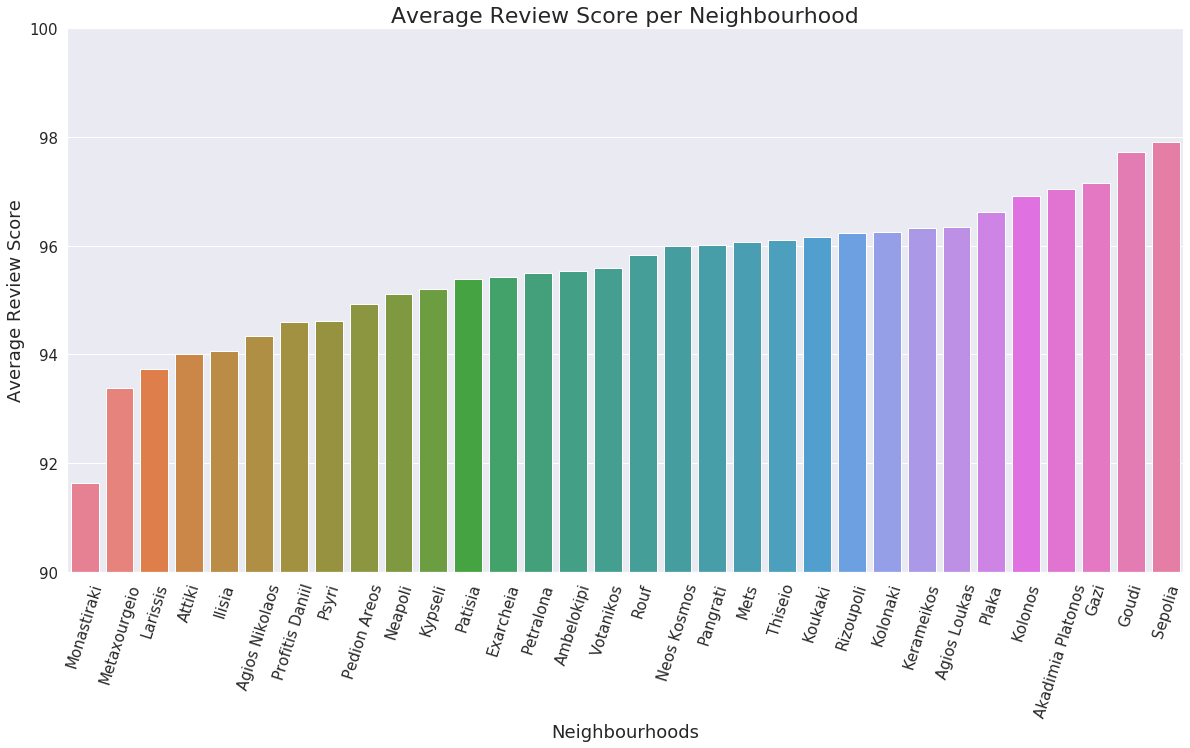

In [146]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x='neighbourhood', y='mean_score', data=new_df, palette='husl')\
                    .set_title('Average Review Score per Neighbourhood',fontsize=22)
plt.ylim(90,100)
plt.xticks(rotation=72.5)
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('Average Review Score', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

We notice that the neighbourhoods with the best reviews are Sepolia an Goudi

In [147]:
"""
In this question we represent the percentage
in bathrooms by room type.
"""

new_df = df[['id','room_type','bathrooms'].copy()]
new_df = new_df.replace('-', np.nan)
new_df = new_df.dropna()
new_df = new_df.groupby(['room_type','bathrooms']).count().reset_index()

display(new_df.style.hide_index())

apt1 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] <= 1)]).sum()
apt2 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
apt3 = (new_df[(new_df['room_type'] == 'Entire home/apt') & (new_df['bathrooms'] > 2)]).sum()

shr1 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] <= 1)]).sum()
shr2 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
shr3 = (new_df[(new_df['room_type'] == 'Shared room') & (new_df['bathrooms'] > 2)]).sum()

prv1 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] <= 1)]).sum()
prv2 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] > 1) & (new_df['bathrooms'] <= 2)]).sum()
prv3 = (new_df[(new_df['room_type'] == 'Private room') & (new_df['bathrooms'] > 2)]).sum()

baths = ['0-1', '1-2', '2+']
apt = [apt1['id'],apt2['id'],apt3['id']]
shr = [shr1['id'],shr2['id'],shr3['id']]
prv = [prv1['id'],prv2['id'],prv3['id']]

room_type,bathrooms,id
Entire home/apt,0.000000,3
Entire home/apt,0.500000,4
Entire home/apt,1.000000,6878
Entire home/apt,1.500000,672
Entire home/apt,2.000000,717
Entire home/apt,2.500000,90
Entire home/apt,3.000000,74
Entire home/apt,3.500000,26
Entire home/apt,4.000000,21
Entire home/apt,4.500000,7


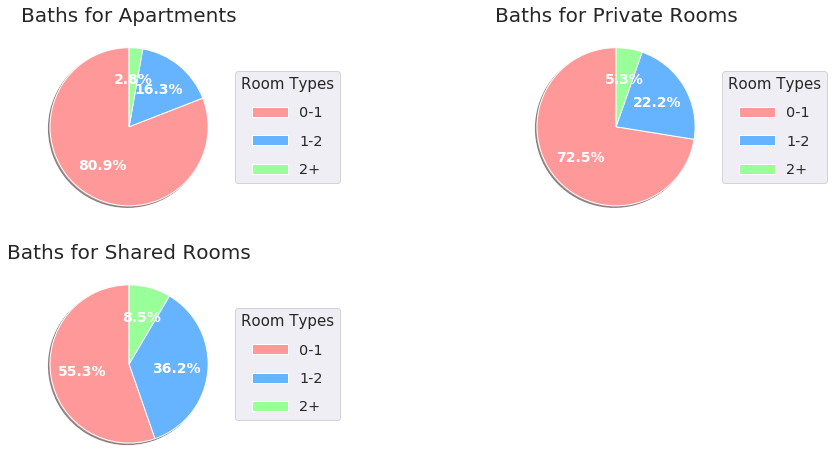

In [148]:
fig, ax = plt.subplots(2, 2,figsize=(16,8), subplot_kw=dict(aspect="equal"))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

wedges, texts, autotexts = ax[0,0].pie(apt, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[0,0].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[0,0].set_title("Baths for Apartments",size=20)

wedges, texts, autotexts = ax[0,1].pie(prv, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[0,1].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[0,1].set_title("Baths for Private Rooms",size=20)

wedges, texts, autotexts = ax[1,0].pie(shr, autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,textprops=dict(color="w"))
ax[1,0].legend(wedges, baths,title="Room Types",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),handlelength=2.5, labelspacing=1, fontsize='large', title_fontsize=15)
plt.setp(autotexts, size=14,weight="bold")
ax[1,0].set_title("Baths for Shared Rooms",size=20)


ax[1,1].remove()


plt.show()

We generally observe that in all types of rooms the 0-1 bathrooms prevail, followed by the 1-2 bathrooms and finally the rooms with more than two bathrooms in a much smaller percentage.

# Data Mining
# Members: 
## 1. Apostolopoulou Alexandra (1115201700005)
## 2. Briakos Spyridon (1115201700101)
## Project 2

In [7]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import time
import sys
import string
import math
import string
import nltk
from nltk import BigramCollocationFinder
from nltk import BigramAssocMeasures
from nltk.collocations import *

## Question 3.1

In [8]:
"""
In this query we created the TF-IDF table of
unigrams and bigrams for the new column,
removing the stop words.
"""

t1 = time.time()
warnings.simplefilter("ignore", UserWarning)

path = '/home/alexa/Documents/Data_Mining/ERGASIA_1/train.csv'
path1 = '/home/alexa/Desktop/greek_stopwords.txt'

df = pd.read_csv(path)
df_new = df[['id','name','description']].copy()
df_new['new_col'] = df_new['name'] + df_new['description'] 
df_new.dropna(axis=0,inplace=True)

#Get rid of the punctiations and the symbols.
for i, row in df_new.iterrows():
    df_new.loc[i,'new_col']  =  df_new.loc[i,'new_col'].lower()
    df_new.loc[i,'new_col'] = ''.join(ch for ch in df_new['new_col'][i] if ch not in set(string.punctuation))
    
greek_stopwords = (pd.read_csv(path1,sep='\n'))
greek_stopwords.columns = ['words']
greek_stopwords = greek_stopwords['words'].tolist()

all_stopwords = list(STOPWORDS) + greek_stopwords

vectorizer = TfidfVectorizer(use_idf=True,stop_words=all_stopwords,ngram_range=(1,2),max_features=1000)
V = vectorizer.fit_transform(df_new['new_col'].tolist())

# print(vectorizer.vocabulary_)
# print(V.toarray())

## Question 3.2

In [9]:
"""
Here we find Cosine Similarity
of all properties between them as well
and the 100 most identical (stored in
a dictionary).
"""


V = V.toarray()
sim = cosine_similarity(V)
np.fill_diagonal(sim,0)
print('Cosine Similarity Matrixs shape: ', sim.shape)

#Select the upper triangle of the array because (x,y)=(y,x) refers to the same estates.
sim = np.triu(sim)

print('Number of 1 into Cosine Similarity Matrix: ', np.count_nonzero(sim==1))
#Convert sim matrix to array and find indices of 100 greatest values of our array.
indices = np.argpartition(sim.flatten(), -100)[-100:]
#Find the original indices of sim matrix of 100 greatest values.
original_indexes = np.unravel_index(indices,sim.shape)
ziped_indexes = list(zip(original_indexes[0],original_indexes[1]))

#Creating dictionary of 100 pairs of most similar pairs. (key: (id1,id2), value: score)
final_dict = {}
for x,y in ziped_indexes:
    score = sim[x][y]
    pair = (df_new['id'][x],df_new['id'][y])
    final_dict[pair] = math.floor(score) 
# print(final_dict)

Cosine Similarity Matrixs shape:  (9552, 9552)
Number of 1 into Cosine Similarity Matrix:  181


## Question 3.3

In [10]:
"""
In this query we made a function
which takes as input one id and one
integer N, and returns the N most
similar properties.
"""

def recommend(item_id, N):
    id_list = df_new['id'].tolist()
    index = id_list.index(item_id)
    sim_list = sim[index]
    indices = (sorted(range(len(sim_list)), key = lambda sub: sim_list[sub])[-1:-N-1:-1])
    print('Based to: ', df_new['name'][index], ' \nDescription: ', df_new['description'][index], '\n\n')
    print('Recommending ', N, ' apartments similar to ', item_id, '\n--------------------------------------------')
    for y in indices:
        print('Recommended: ', df_new['name'][y], '\nDescription: ', df_new['description'][y], '\n')
recommend(10595,5)

Based to:  96m2, 3BR, 2BA, Metro, WI-FI etc...  
Description:  Athens Furnished Apartment No6 is 3-bedroom apartment with 2-bathrooms -excellent located  -close to metro station,  -lovely,  -very clean  with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned… Athens Furnished Apartment No6 is an excellent located, close to metro, lovely, very clean 3-bedroom apartment with 2-bathrooms with all the facilities that you will need and balcony. It is on the 2nd floor but do not worry because there is elevator in the building. Fully equipped kitchen with everything you need to prepare your lunch/dinner. Living room to relax and enjoy a movie or a sport event. 2 Clean nice bathrooms. For more than 6 people there is a sofa/bed.  Apartment No6 has everything you will need. 1st Bedroom – Double bed 2nd Bedroom – 2 single beds 3rd Bedroom – 2 single beds -Telephone line for incoming calls or to call us if you need something. -Free fast Wi-Fi from

## Question 3.4

In [11]:
"""
Here we used BigramCollocationFinder
to find the 10 words that tend to
appear together more often.
"""

filter_stops = lambda w: len(w) < 3 or w in all_stopwords 
text = nltk.wordpunct_tokenize(' '.join([str(elem) for elem in df_new['new_col'].tolist()]))
text = (ch for ch in text if ch not in set(string.punctuation))
text = [w.lower() for w in text]
    
biagram_collocation = BigramCollocationFinder.from_words(text)
biagram_collocation.apply_word_filter(filter_stops) 
biagram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 10) 

[('living', 'room'),
 ('fully', 'equipped'),
 ('metro', 'station'),
 ('walking', 'distance'),
 ('double', 'bed'),
 ('washing', 'machine'),
 ('equipped', 'kitchen'),
 ('syntagma', 'square'),
 ('brand', 'new'),
 ('air', 'conditioning')]

In [12]:
t2 = time.time()
print("Time elapsed: ",t2-t1)

Time elapsed:  34.558918952941895
